# Лабораторная работа №1
## Партин М. Ю. А-13а-20
## Вариант 17
### Задание 1.1
***
Найти значения  машинного нуля, машинной бесконечности и машинного эпсилон.

**Машинный ноль** - минимальное числовое значение в ЭВМ. Все числа меньше, которого воспринимаются ЭВМ как ноль. 

Для определения машинного нуля используем следующий алгоритм. Ищем максимальное значение m, при котором выражение $ 2^{-m - 1} $
дает ноль



In [2]:
#Первая часть лр, определение машинного нуля, бесконечности  и эпсилон
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt

# Функция для определения машинного нуля
def machineZero():
    m = 1
    while 2**(-m) != 0:
        m += 1
    m -= 1
    return 2**(-m)
print(f"Машинный ноль: {machineZero():.2e}")

Машинный ноль: 4.94e-324


**Машинная бесконечность** - максимальное числовое значение в ЭВМ. Все числа, больше которого воспринимаются ЭВМ как бесконечность

Используем следующий алгоритм для определения машинной бесконечности. Ищем, такое минимальное значение m, при котором у выражения $ 2^{m} $ происходит переполнение.

In [3]:
# Функция для определения машинной бесконечности
def machineINF():
    m = 1.0
    while not np.isinf(m * 2.0):
        m *= 2.0
    return m
print(f"Машинная бесконечность: {machineINF():.2e}")

Машинная бесконечность: 8.99e+307


**Машинный эпсилон** характеризует точность представление чисел в ЭВМ. Эта граница 
относительной погрешности представления чисел в ЭВМ

Для опредения машинного эпсилон будет использовать следующий алгоритм. Найдем минимальное значение m, при котором число $ 1 + 2^{-m} $ воспринимается ЭВМ как единица

In [4]:
def machineEPS():
    m = 1
    while 1 + 2**(-m) != 1:
        m += 1
    return 2**(-m)
print(f"Машинный ноль: {machineEPS():.2e}")

Машинный ноль: 1.11e-16


### Задание 1.2

**Заданная функция:**

$ f(x) = e^x - x - 1 $

Отрезок:
$ [a, b] = [-9, -5] $

Записать разложение заданной функции в ряд Тейлора окрестности нуля

Разложение функции в ряд Тейлора в окрестности нуля имеет следующий вид 

$$ f(x) = \sum\limits_{k=2}^{\infty} {\frac{x^k}{k!}} $$

Запишем это в коде.

f(x) - это есть функция заданная по условию задачи

k_term - это есть k-ый член ряда Тейлора

S(x, n) - это есть частичная сумма ряда Тейлора от 0 до n

In [5]:
# Вторая часть лр

#Функция заданная в задачи
def f(x):
    return np.exp(x) - x - 1

# k - ий член разложения исходной функции в ряд Тейлора
def k_term(x, k):
    if k == 0 or k == 1:
        return x * 0
    # Начиная со второго члена
    return x**k / math.factorial(k)

def S(x, n):
    res = x * 0
    for i in range(0, n):
        res = res + k_term(x, i) # Почему-то res += k_term(x, i) не работает. Интересно)
    return res


Для построения графика равномерно заполняем массив значений x_data, с помощью функции np.linspace. А также находим середину отрезка

In [6]:
# Отрезок на котором задана функция
a = -9
b = -5
c = (a + b) / 2
x_data = np.linspace(a, b, 10000, dtype = float)

Строим график исходной функции $ f(x) $ на заданном отрезке.

Также строим на заданном отрезке графики частичных сумм ряда Тейлора S(x, n) c 0 по 5-ую.

Также строим графики абсолютной погрешности первых пяти частичных сумм на заданном отрезке

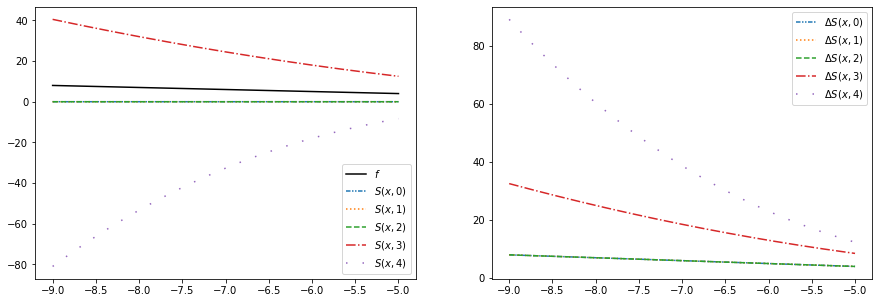

In [7]:
# Построение графиков исходной функции и ее частичных сумм с 1-ой по 5-ую

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(x_data, f(x_data), label = "$f$", color = "black")

#задаем кортеж из стилей линий
line_styles = ((0, (3, 1, 1, 1, 1, 1)), 'dotted', 'dashed',
'dashdot', (0, (1, 10)))


for i in range(0,5):
    axs[0].plot(x_data, S(x_data, i), label=f'$S(x,{i})$',
        ls=line_styles[i])

    
#в цикле рисуем погрешность S на втором графике
for i in range(0,5):
    axs[1].plot(x_data, np.abs(S(x_data, i)-f(x_data)),
        label=f'$\Delta S(x,{i})$', ls=line_styles[i])
    
axs[0].legend()
axs[1].legend()

Определяем количество членов ряда n_machine_error, при котором величина относительной погрешности  в средней  точке отрезка  станет меньше машинного эпсилон. 

Для этого считаем отношение прибавляемого члена к k-oй частичной суммы. И пока это значение больше машинного эпсилона продолжаем вычисление

In [8]:
# Определение количества членов ряда S, при котором величина относительной погрешности в средней
# точке меньше машинного эпсилона

eps = machineEPS()
p_sum = k_term(c, 2)
n_machine_error = 2
n_t = k_term(c, 2)

while np.abs(n_t / p_sum) > eps:
    n_machine_error += 1
    n_t = k_term(c, n_machine_error)
    p_sum += n_t
    
print(n_machine_error)


42


Строим графики абсолютной и относительной погрешности при найденном значении n_machine_error

Также для того, чтобы более подробно понять как введут себя графики задаем определенное значение по оси OY для нижних графиков

[(0.0, 1e-12)]

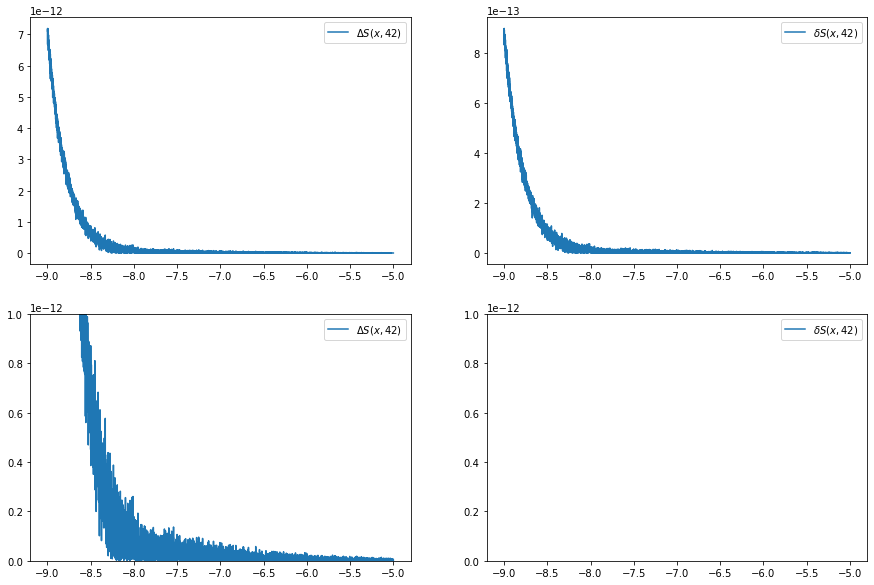

In [9]:
# Построение графиков абсолютной и относительной погрешности при найденном значении n_machine_error
#делаем рисунок из четырех графиков

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0][0].plot(x_data, np.abs(f(x_data) - S(x_data, n_machine_error)),
    label=f'$\Delta S(x,{n_machine_error})$')

axs[0][1].plot(x_data, np.abs((f(x_data) - S(x_data, n_machine_error))
    / S(x_data, n_machine_error)), label=f'$\delta S(x,{n_machine_error})$')

axs[1][0].plot(x_data, np.abs(f(x_data) - S(x_data, n_machine_error)),
    label=f'$\Delta S(x,{n_machine_error})$')

axs[1][1].plot(x_data, np.abs(f(x_data) - S(x_data, n_machine_error)
    / S(x_data, n_machine_error)), label=f'$\delta S(x,{n_machine_error})$')

axs[0][0].legend()
axs[0][1].legend()
axs[1][0].legend()
axs[1][1].legend()

# Границы для нижных графиков
axs[1][0].set(ylim=(0.0, 10E-13))
axs[1][1].set(ylim=(0.0, 10E-13))

Функция, которая округляет числа до 4 разрядов мантиссы

In [1]:
# Округление до t разрядов мантиссы
def round(x):
    return float(np.format_float_scientific(x, precision = 4))

Пишем функцию для округляения определенное значение ряда Тейлора при заданном x S(x, n) до 4 разрядов мантиссы

Также запишем функцию, которая округляет уже все члены массива сумм ряда Тейлора до 4 разрядов мантиссы

In [86]:
# Округление одного элемента до t разрядов мантиссы
def roundItem(x, n):
    res = 0
    for i in range(n):
        res = res + round(k_term(x, i)) # Также почему-то есть проблема res += round
        res = round(res)
    return res

# Округление всего массива сумм Тейлора
def sRounded(x, n):
    res = x.copy()
    for i in range(len(x)):
        res[i] = roundItem(x[i], n)
    return res

Строим графики абсолютной и относительной погрешности частичных сумм ряда Тейлора при n = n_machine_error

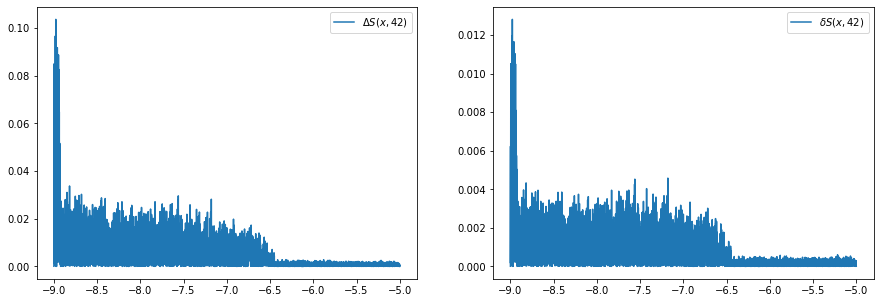

In [85]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(x_data, np.abs(f(x_data) - sRounded(x_data, n_machine_error)),
    label=f'$\Delta S(x,{n_machine_error})$')
    
axs[1].plot(x_data, np.abs((f(x_data) - sRounded(x_data, n_machine_error))
    /sRounded(x_data, n_machine_error)), label=f'$\delta S(x,{n_machine_error})$')

axs[0].legend()
axs[1].legend()

**Вывод** - при округлении чисел до 4 разрядов мантиссы мы получили огромную погрешность. Так как мы тераем точность вычислении при округлении чисел. И с каждой итерацией это точность вычисления все понижается и понижается

### Задание 1.3

Дана функция $ f(a, b, c) $. Значения переменных указаны в варианте со всеми верными цифрами. Оценить погрешность результата двумя способами: а) используя оценки погрешности для арифметических операций, б) используя общую формулу погрешностей. Результат представить в двух формах записи: с явным указанием погрешностей и с учетом количества верных цифр

Заданная функция:

$$ f(a, b, c) = \frac{a - 3b}{a^2 + 3c} $$

Заданные значения в точках:

$ a = 4,29 $

$ b = 13,8 $

$ c = 10,98 $

***

### Пункт 1 расчет погрешности используя оценку погрешности для арифметических операций

На лекции мы договорились о следующем соглашении.  Будем считать, что по умолчанию задаются приближенные числа с абсолютной погрешностью равной $\Delta = 5 \cdot 10^{-N-1}$, где N- номер последнего оставленного разряда. Отсюда

$ \Delta{a} = 0,005 $

$ \Delta{b} = 0,05 $

$ \Delta{c} = 0,005 $


$ \delta{a} = 0.00117 $

$ \delta{b} = 0.0036 $

$ \delta{c} = 0.00046 $

$ f(4,29; 13,8; 10,98) = −0, 18522 $


Будем считать, что по умолчанию задаются приближенные числа с абсолютной погрешностью равной , где N- номер последнего оставленного разряда

Так как в данной функции присутствуют умножение и операции деления. То проще будет посчитать относительную погрешность, а потом зная ее посчитать и абслолютную погрешность

$$ \delta\left(f(a, b, c)\right) = \delta\left(\frac{a - 3b}{a^2 + 3c}\right) = 
    \delta\left(a - 3b\right) + \delta\left(a^2 + 3c\right) = 
$$

Распишем по определению относительной погрешности 

$$  = \frac{\Delta\left|a - 3b\right|}{\left|a - 3b\right|} + \frac{\Delta\left|a^2 + 3c\right|}{\left|a^2 + 3c\right|} =
  \frac{\Delta\left|a\right| + 3\Delta\left|b\right|}{\left|a - 3b\right|} + \frac{\Delta\left|a^2\right| + 3\Delta\left|c\right|}{\left|a^2 + 3c\right|}$$ = 
  
Осталось избавится от $ \Delta\left|a^2\right| $. Для этого перепишем эту погрешность через относительную

$$ = \frac{\Delta\left|a\right| + 3\Delta\left|b\right|}{\left|a - 3b\right|} + \frac{\delta\left(a^2\right) \cdot \left|a^2\right| + 3\Delta\left|c\right|}{\left|a^2 + 3c\right|} = \frac{\Delta\left|a\right| + 3\Delta\left|b\right|}{\left|a - 3b\right|} + \frac{2\delta\left(a\right) \cdot \left|a^2\right| + 3\Delta\left|c\right|}{\left|a^2 + 3c\right|} $$

Таким образом подставив полученные значения в формулу получим относительную и абсолютную погрешность

$$ \Delta\left(f(a,b,c)\right) = \frac{0,005 + 3 \cdot 0,05}{\left|4,29 - 3 \cdot 13.8 \right|} + \frac{2 \cdot 0,00117 \cdot
\left|4,29^{2} \right| + 3 \cdot 0,005}{\left|4,29^{2} + 3 \cdot 10,98\right|} $$

$ \delta\left(f(a, b, c)\right) = 0,0053 $

$\Delta\left(f(a,b,c)\right) = 0,0053 \cdot 0, 18522 = 0.00098$

***

**Ответ на 1 пункт**

Запись ответа с учетом количества верных значащих цифр

$ f(4,29; 13,8; 10,98) = −0, 185 $ (3 верные цифры)

С явным указанием погрешности

$ f(4,29; 13,8; 10,98) = -0,18500 \pm 0,00098 $ 




### Пункт 2 расчет погрешности используя  общую формулу погрешности

Воспользуемся следующей формулой

$$ \Delta\left(f(a, b, c)\right) = \left|\frac{\partial f(a, b, c)}{\partial a}\right| \cdot \Delta(a)
    + \left|\frac{\partial f(a, b, c)}{\partial b}\right| \cdot \Delta(b) + \left|\frac{\partial f(a, b, c)}{\partial c}\right| \cdot \Delta(c)
$$

$$ \frac{\partial f(a, b, c)}{\partial a} = \frac{a^2 + 3c - 2a(a - 3b)}{\left(a^2 + 3c\right)^2}$$


$$ \frac{\partial f(a, b, c)}{\partial b} = -\frac{3}{a^2 + 3c}$$

$$ \frac{\partial f(a, b, c)}{\partial c} = -\frac{3(a - 3b)}{\left(a^2 + 3c\right) ^ 2}$$ 


Подставив полученные значения в формулу получим

$$ \frac{\partial f(a, b, c)}{\partial a} = \frac{4,29 ^ {2} + 3 \cdot 10,98 - 2 \cdot 4,29 \cdot \left(4,29 - 3 \cdot 13,8\right)}{\left(4,29 ^ {2} + 3 \cdot 10,98 \right) ^ {2}} = 0,140257025 $$


$$ \frac{\partial f(a, b, c)}{\partial b} = - \frac{3}{4,29^2 + 3 \cdot 10,98} = -0,058429303 $$ 

$$  \frac{\partial f(a, b, c)}{\partial c} = - \frac{3 \cdot \left(4,29 - 3 \cdot 13,8 \right)}{(4,29 ^ 2 + 3 \cdot 10,98) ^ 2} 
 = 0,042230975 $$ 


$$  \Delta\left(f(a, b, c)\right) = \left|0,140257025 \right| \cdot 0,005 + \left|-0,058429303 \right| \cdot 0,05 + 
\left|0,042230975 \right| \cdot 0,005 = 0,00383390515$$ 

$$ \Delta\left(f(a, b, c)\right) = 0, 0038 $$


$$ \delta\left(f(a, b, c)\right) = 0,0038 \cdot \left|-0,18522\right| = 0, 0007 $$

**Ответ на 2 пункт**

Запись ответа с учетом количества верных значащих цифр

$ f(4,29; 13,8; 10,98) = −0, 19 $ (2 верные цифры)

С явным указанием погрешности

$ f(4,29; 13,8; 10,98) = -0,1900 \pm 0,0038 $ 


**Вывод**

Используя формулу для погрешности арифметических операции мы получили более 
точные значение относительной и абсолютной погрешности. Но ее использование оказалось более трудоемким, чем использование общей формулы для погрешности функции